<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat2/A6_Read_Excel_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, read_file, GeoDataFrame

In [2]:
nama='lsm.zip'
kota=gpd.read_file(nama)

<Axes: >

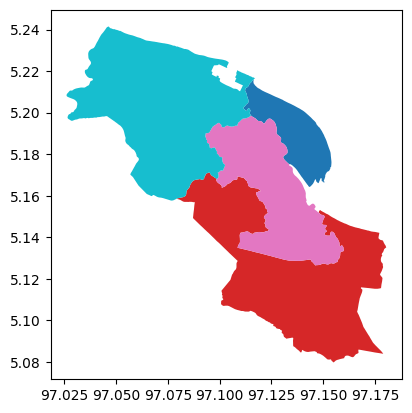

In [5]:
kota.plot(column='NAMOBJ')

<Axes: >

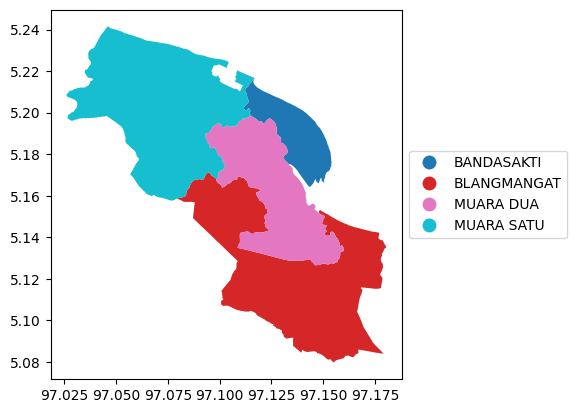

In [7]:
kota.plot(column='NAMOBJ', legend=True,
          legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

In [20]:
import mapclassify
kota.explore(column='NAMOBJ', tooltip='NAMOBJ',
             popup=True,tiles="CartoDB positron",
             cmap='Set1', style_kwds=dict(color="red"))

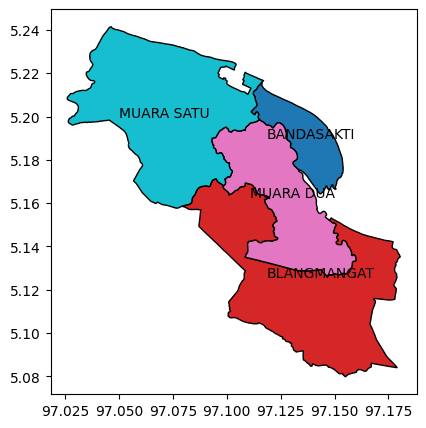

In [33]:
kota['coords']=kota['geometry'].apply(lambda x:
                                      x.representative_point().coords[:])
kota['coords']=[coords[0] for coords in kota['coords']]
fig, ax = plt.subplots(figsize=(5,5))
kota.plot(ax=ax, column='NAMOBJ', categorical=True, edgecolor='black')
for idx, row in kota.iterrows():
  plt.annotate(text=row['NAMOBJ'], xy=row['coords'],
               horizontalalignment='center',color='black' )

In [34]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)"
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)"
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)"
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)"


In [35]:
import pandas as pd
data=pd.read_excel('penduduk.xlsx')

In [36]:
data.head()

,NAMOBJ,jumlah
0,BANDASAKTI,1200
1,BLANGMANGAT,900
2,MUARA DUA,1000
3,MUARA SATU,850


In [38]:
kota1=kota.merge(data, on='NAMOBJ')
kota1.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords,jumlah
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)",1200
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)",900
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)",1000
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)",850


<Axes: >

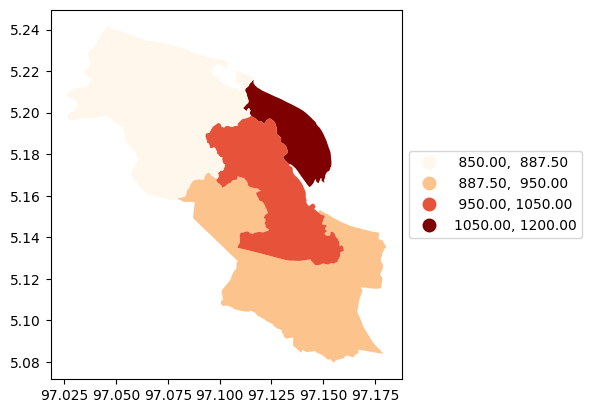

In [45]:
kota1.plot(column='jumlah', scheme="QUANTILES",
           cmap="OrRd", legend=True,k=4,
           legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)}
           )